<a href="https://colab.research.google.com/github/Ishaa111/Computer-Vision-using-Tensorflow/blob/main/02_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf

In [8]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [9]:
import pathlib

path='/content/drive/MyDrive/Colab Notebooks/dataset'
data_dir = pathlib.Path(path)


In [10]:
# Print image count
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2045


In [11]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print(output_classes)

['without_mask', 'with_mask', 'incorrect_mask']


[686, 690, 675]


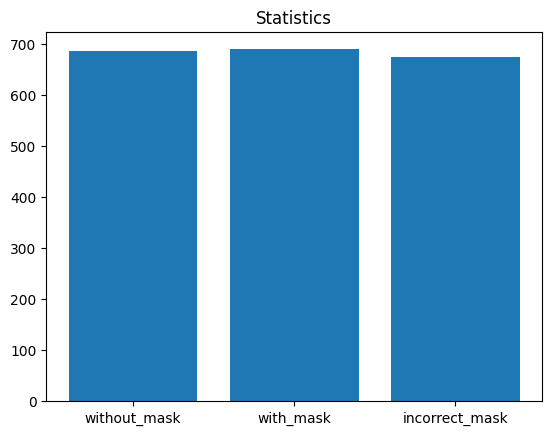

In [16]:
# Plot count of each ouput label
import matplotlib.pyplot as plt

count=[]
for label in output_classes:
   this_path = os.path.join(path, label)
   dir=pathlib.Path(this_path)
   im_count=os.listdir(dir)
   count.append(len(im_count))

print(count)

plt.bar(output_classes,count)
plt.title("Statistics")
plt.show()

In [17]:
# Check some sample images (Use of cv2)
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Your code

image_all = list(data_dir.glob('*/*.jpg'))
image_all[:4]
len(image_all)


2045

In [18]:
image_without_mask = list(data_dir.glob('without_mask/*'))
image_mask_weared_incorrect = list(data_dir.glob('incorrect_mask/*'))
image_with_mask = list(data_dir.glob('with_mask/*'))


In [19]:
all_images_dict = {
    'without_mask' : image_without_mask,
    'mask_weared_incorrect' : image_mask_weared_incorrect,
    'with_mask' : image_with_mask,
}
all_images_labels = {
    'without_mask' : 0,    'mask_weared_incorrect' : 1,
    'with_mask' : 2,
}

In [20]:
#Shuffle
import random
random.shuffle(image_all)
image_all[:6]


[PosixPath('/content/drive/MyDrive/Colab Notebooks/dataset/with_mask/56-with-mask.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/dataset/with_mask/408-with-mask.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/dataset/incorrect_mask/aug_171.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/dataset/without_mask/412.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/dataset/incorrect_mask/aug_232.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/dataset/without_mask/332.jpg')]

In [22]:
X, y = [], []

for mask_type, images in all_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(128,128))
        X.append(resized_img)
        y.append(all_images_labels[mask_type])


2


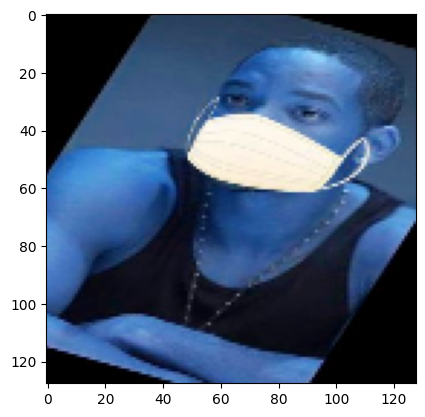

In [29]:
import matplotlib.pyplot as plt

#with_mask
plt.imshow(X[2044])
print(y[2044])

0


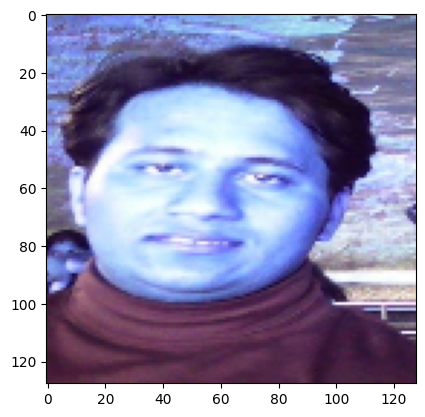

In [31]:
#without_mask
plt.imshow(X[300])
print(y[300])

1


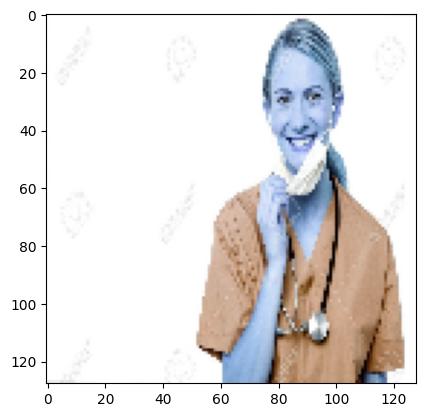

In [34]:
#mask_weared_incorrectly
plt.imshow(X[940])
print(y[940])

In [35]:
# Check shape of the images in your dataset. This will be helpful while specifying input_shape in your Transfer Learning Model
shapes = []
for images in image_all:
  temp = cv2.imread(str(images))
  shapes.append(temp.shape)
shapes = np.array(shapes)
# shapes.shape
shape_uniq = np.unique(shapes,axis = 0)
shape_uniq.shape

(302, 3)

In [ ]:
# Check if all the images have same shape, else you need to resize them to some common size
# The code provided as it is above in the template will help

In [36]:
# If the shape is variable, reshape to a common size
print(shape_uniq.reshape(-1))
# If it is same, prove it

[ 141  114    3  152  270    3  157  155    3  159  318    3  165  306
    3  166  303    3  168  299    3  168  300    3  169  299    3  170
  296    3  174  290    3  178  150    3  181  278    3  182  276    3
  183  275    3  183  276    3  184  273    3  193  261    3  194  259
    3  194  260    3  195  258    3  196  257    3  203  187    3  203
  249    3  206  245    3  208  165    3  208  242    3  212  238    3
  213  191    3  217  232    3  218  200    3  220  229    3  221  156
    3  221  173    3  221  228    3  222  110    3  222  161    3  224
  225    3  225  154    3  225  225    3  227  222    3  230  167    3
  233  203    3  235  148    3  237  213    3  240  224    3  240  225
    3  241  167    3  244  206    3  244  214    3  246  205    3  247
  204    3  247  209    3  248  203    3  248  261    3  249  167    3
  249  202    3  250  226    3  250  250    3  251  166    3  251  205
    3  252  237    3  253  199    3  254  198    3  254  199    3  256
  197 

In [37]:
print(len(image_without_mask))
print(len(image_with_mask))
print(len(image_mask_weared_incorrect))

X = np.array(X)
y= np.array(y)


686
690
675


In [38]:
#test_&_train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

X_train[0].shape

(128, 128, 3)

In [ ]:
# Anything else you want to plot/experiment

In [39]:
import tensorflow_hub as hub

In [40]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential


In [41]:
# Choose and define base model
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=X_train[0].shape,
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [42]:
# Print base model summary and have a look at the layers
resnet_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# As we're using Transfer Learning, you do not need to train all the layers. Freeze all of the layers or train some layers (experiment)


In [43]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))


In [44]:
# Add the final output layer
#adding final output layer
resnet_model.add(Dense(3, activation='softmax'))

In [45]:
resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,638,339 (93.99 MB)

 Trainable params: 1,050,627 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [46]:
# Compile you model (set the parameters like loss/optimizers/metrics)
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [47]:
from keras.applications.vgg16 import preprocess_input # Change according to your base model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.2,
)

In [ ]:
# Anything else you wish to try

In [48]:
# Your code
train_generator = train_datagen.flow(X_train, y_train, batch_size=32,
         subset='training')
validation_generator = train_datagen.flow(X_train, y_train,
         batch_size=8, subset='validation')


In [49]:
from keras.callbacks import ModelCheckpoint
# ModelCheckpoint is helpful to save the model giving best results (brownie points)


In [50]:
resnet_model.fit(train_generator, validation_data = validation_generator, epochs = 10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6928 - loss: 1.6148

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.6960 - loss: 1.5952 - val_accuracy: 0.8502 - val_loss: 0.6288
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.9475 - loss: 0.1516 - val_accuracy: 0.9446 - val_loss: 0.1678
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.9600 - loss: 0.0835 - val_accuracy: 0.9446 - val_loss: 0.2248
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - accuracy: 0.9717 - loss: 0.0801 - val_accuracy: 0.9479 - val_loss: 0.1545
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.9828 - loss: 0.0457 - val_accuracy: 0.9511 - val_loss: 0.1896
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.9771 - loss: 0.0565 - val_accuracy: 0.9414 - val_loss: 0.1994
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 118s 3s/step - accuracy: 0.9752 - loss: 0.0673 - val_accuracy: 0.9479 - val_loss: 0.1961
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.9758 - loss: 0.0396 - val_accuracy: 0.9316 - val_loss: 0.

In [ ]:
# Plot training & validation loss/accuracy values


In [51]:
acc = resnet_model.history.history['accuracy']
val_acc = resnet_model.history.history['val_accuracy']
loss = resnet_model.history.history['loss']
val_loss = resnet_model.history.history['val_loss']


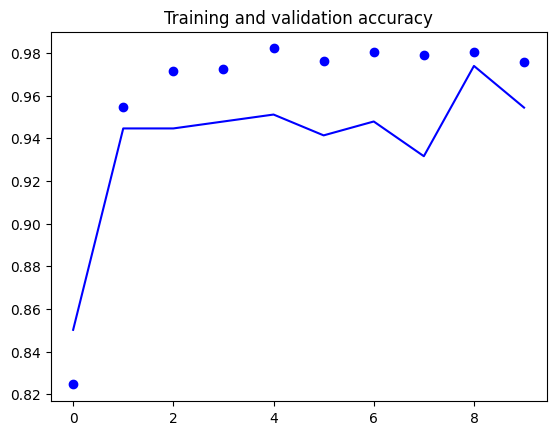

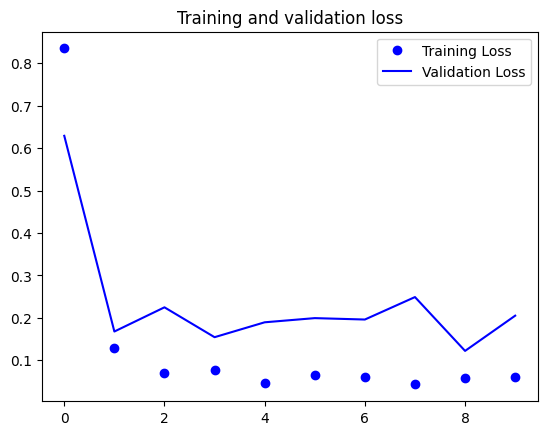

In [52]:
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [53]:
#Classification_Report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
predictions = resnet_model.predict(X_test)
predict_class = []
for predics in predictions:
  m = np.argmax(predics)
  predict_class.append(m)
predict_class = np.array(predict_class)
predict_class
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(predict_class,y_test,target_names=target_names))


17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step
              precision    recall  f1-score   support

     class 0       0.98      0.97      0.98       179
     class 1       0.98      0.96      0.97       165
     class 2       0.96      0.98      0.97       169

    accuracy                           0.97       513
   macro avg       0.97      0.97      0.97       513
weighted avg       0.97      0.97      0.97       513



In [54]:
print(confusion_matrix(predict_class,y_test))

[[174   1   4]
 [  3 159   3]
 [  0   3 166]]
